In [3]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize as opt
import math

In [2]:
data1 = scio.loadmat("ex4data1.mat")
X = data1['X']
y = data1['y']
data2 = scio.loadmat("ex4weights.mat")
Theta1 = data2['Theta1']
Theta2 = data2['Theta2']

In [5]:
def displayData(X, example_width):
    m, n = X.shape
    example_width = int(example_width)
    example_height = int(n / example_width)
    display_rows = int(np.floor(math.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    h, display_arr = plt.subplots(nrows = display_rows, ncols = display_cols, sharex = True, sharey = True, figsize = (8, 8))
    plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
    for i in range(display_rows):
        for j in range(display_cols):
            display_arr[i, j].matshow(np.array(X[i * display_cols + j]).reshape(example_height, example_width).T, cmap = matplotlib.cm.gray)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    return h, display_arr

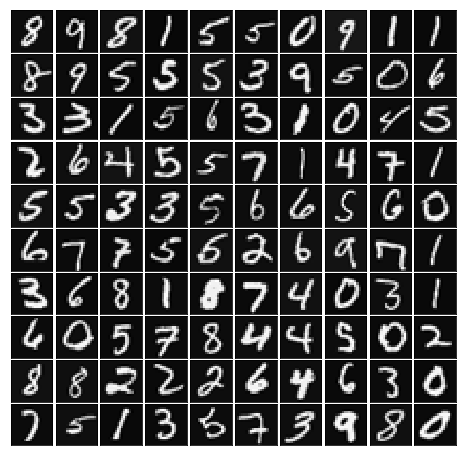

In [7]:
random_indices = np.random.choice(np.arange(X.shape[0]), 100)
sel = X[random_indices, :]
h, display_arr = displayData(sel, 20)

In [8]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [65]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    m, n = X.shape
    len1 = hidden_layer_size * (input_layer_size + 1)
    len2 = num_labels * (hidden_layer_size + 1)
    Theta1 = np.array(nn_params[0:len1]).reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = np.array(nn_params[len1 : len1 + len2]).reshape(num_labels, hidden_layer_size + 1)
    X = np.column_stack((np.ones((m, 1)), X))
    a2 = sigmoid(np.dot(X, Theta1.T))
    a2 = np.column_stack((np.ones((m, 1)), a2))
    a3 = sigmoid(np.dot(a2, Theta2.T))
    h = np.eye(num_labels)
    y = h[y.reshape(-1) - 1]
    s1 = np.sum(y * np.log(a3))
    s2 = np.sum((1 - y) * np.log(1 - a3))
    s3 = np.sum(np.power(Theta1[:, 1:Theta1.shape[1]],2))
    s4 = np.sum(np.power(Theta2[:, 1:Theta2.shape[1]],2))
    J = -1 / m * (s1 + s2) + Lambda / 2 / m * (s3 + s4)
    return J

In [70]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
Lambda = 1
theta1 = Theta1.ravel()
theta1 = theta1.reshape(len(theta1),1)
theta2 = Theta2.ravel()
theta2 = theta2.reshape(len(theta2),1)
nn_params = np.vstack((theta1, theta2)).reshape(-1)
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

0.38376985909092365

In [71]:
def sigmoidGradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [112]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out, L_in + 1) * 2 * epsilon_init - epsilon_init
    return W

In [107]:
def nnGradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    m, n = X.shape
    len1 = hidden_layer_size * (input_layer_size + 1)
    len2 = num_labels * (hidden_layer_size + 1)
    Theta1 = nn_params[0 : len1].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[len1 : len1 + len2].reshape(num_labels, hidden_layer_size + 1)
    h = np.eye(num_labels)
    y = h[(y - 1).reshape(-1), :]
    X = np.column_stack((np.ones((m, 1)), X))
    z2 = np.dot(X, Theta1.T)
    a2 = sigmoid(z2)
    a2 = np.column_stack((np.ones((m, 1)), a2))
    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)
    delta3 = a3 - y
    delta2 = np.dot(delta3, Theta2)
    delta2 = delta2[:, 1 : hidden_layer_size + 1] * sigmoidGradient(z2)
    delta_2 = np.dot(delta3.T, a2)
    delta_1 = np.dot(delta2.T, X)
    r1 = np.hstack((np.zeros((hidden_layer_size, 1)), Theta1[:, 1 : input_layer_size + 1]))
    r2 = np.hstack((np.zeros((num_labels, 1)), Theta2[:, 1 : hidden_layer_size + 1]))
    grad1 = 1 / m * delta_1 + Lambda / m * r1
    grad2 = 1 / m * delta_2 + Lambda / m * r2
    grad1 = grad1.reshape(len(grad1.ravel()), 1)
    grad2 = grad2.reshape(len(grad2.ravel()), 1)
    grad = np.vstack((grad1, grad2))
    return np.array(grad).ravel()

In [96]:
def debugInitializeWeights(fan_in, fan_out):
    W = np.zeros((fan_out, fan_in + 1))
    W = np.sin(np.arange(1, len(W.ravel())+1)).reshape(W.shape) / 10
    return W

In [108]:
def checkNNGradients(Lambda = 0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    Theta1 = debugInitializeWeights(input_layer_size, hidden_layer_size)
    Theta2 = debugInitializeWeights(hidden_layer_size, num_labels)
    X = debugInitializeWeights(input_layer_size - 1, m)
    y = np.mod(np.arange(1, m + 1),num_labels).reshape(m,1) + 1
    Theta1 = Theta1.reshape(len(Theta1.ravel()), 1)
    Theta2 = Theta2.reshape(len(Theta2.ravel()), 1)
    nn_params = np.vstack((Theta1, Theta2)).reshape(-1)
    grad = nnGradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)
    numgrad = np.zeros(len(nn_params))
    perturb = np.zeros(len(nn_params))
    e = 1e-4
    for i in range(len(nn_params)):
        perturb[i] = e
        loss1 = nnCostFunction(nn_params + perturb, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)
        loss2 = nnCostFunction(nn_params - perturb, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)
        numgrad[i] = (loss1 - loss2) / 2 / e
        perturb[i] = 0
    diff = np.linalg.norm(grad - numgrad) / np.linalg.norm(grad + numgrad)
    return diff

In [109]:
checkNNGradients(Lambda = 0)

2.2415232911238977e-11

In [110]:
checkNNGradients(Lambda = 1)

2.2771910132659016e-11

In [128]:
Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
Theta1 = Theta1.reshape(len(Theta1.ravel()), 1)
Theta2 = Theta2.reshape(len(Theta2.ravel()), 1)
nn_params = np.vstack((Theta1, Theta2)).reshape(-1)
nn_params = opt.fmin_cg(f = nnCostFunction, x0 = nn_params, fprime = nnGradient, args = (input_layer_size, hidden_layer_size, num_labels, X, y, Lambda), maxiter = 400, disp = False)

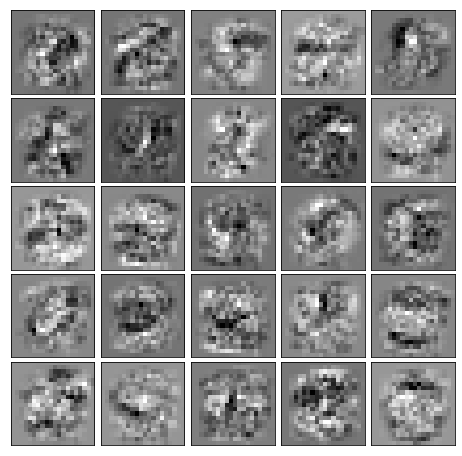

In [129]:
len1 = hidden_layer_size * (input_layer_size + 1)
len2 = num_labels * (hidden_layer_size + 1)
Theta1 = nn_params[0:len1].reshape(hidden_layer_size, input_layer_size + 1)
Theta2 = nn_params[len1:len1 + len2].reshape(num_labels, hidden_layer_size + 1)
h2, display_arr2 = displayData(Theta1[:, 1 : input_layer_size + 1], 20)

In [118]:
def predict(Theta1, Theta2, X):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    a2 = sigmoid(np.dot(X, Theta1.T))
    a2 = np.hstack((np.ones((m, 1)), a2))
    a3 = sigmoid(np.dot(a2, Theta2.T))
    p = np.argmax(a3, axis = 1) + 1
    return p.reshape(m, 1)

In [130]:
p = predict(Theta1, Theta2, X)
print("Accuracy = %.2f%%"%(np.mean(p == y) * 100))

Accuracy = 99.46%
